***Covid-19 data Analysis based on a 2022 and 2023 dataset***

In [46]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the COVID-19 data
covid_data = pd.read_csv("synthetic_covid_data.csv")
# Display basic information about the dataset
print(covid_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1825 non-null   object
 1   Country         1825 non-null   object
 2   ConfirmedCases  1825 non-null   int64 
 3   Deaths          1825 non-null   int64 
 4   Recovered       1825 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 71.4+ KB
None


In [47]:
# Display the first few rows of the dataset
print(covid_data.head())

         Date Country  ConfirmedCases  Deaths  Recovered
0  2022-11-17   China           65135    3830      26778
1  2022-08-03   India           88196    1370       9273
2  2022-06-26   India           94209     823      66087
3  2022-09-06  France           56953     699      23501
4  2022-02-25   India           71858    1547      87944


In [48]:
# Summary statistics
print(covid_data.describe())



       ConfirmedCases       Deaths     Recovered
count     1825.000000  1825.000000   1825.000000
mean     50094.205479  2524.404384  45825.723288
std      28342.411027  1468.519417  25504.962529
min       1017.000000    12.000000    139.000000
25%      25479.000000  1230.000000  24459.000000
50%      50449.000000  2518.000000  47549.000000
75%      74471.000000  3820.000000  67469.000000
max      99948.000000  4999.000000  89997.000000


In [49]:
# Sorting by 'date'
covid_data_sorted_by_date = covid_data.sort_values(by='Date')
print("\nData Sorted by Date:")
print(covid_data_sorted_by_date.head())

# Sorting by 'confirmed cases'
covid_data_sorted_by_cases = covid_data.sort_values(by='ConfirmedCases', ascending=False)
print("\nData Sorted by Confirmed Cases:")
print(covid_data_sorted_by_cases.head())


Data Sorted by Date:
            Date  Country  ConfirmedCases  Deaths  Recovered
951   2022-01-01    China            5018     376      64261
1623  2022-01-01   France            1049    4113      27097
1735  2022-01-01      USA           62798    4510      70887
1102  2022-01-01  Germany            8007    2088      12246
1192  2022-01-01    India           89360    4722        344

Data Sorted by Confirmed Cases:
            Date  Country  ConfirmedCases  Deaths  Recovered
321   2022-02-04  Germany           99948    4016      15539
1233  2022-08-03      USA           99792    3453      74356
1093  2022-07-11  Germany           99766    2378       6462
1458  2022-01-12  Germany           99641    1145      29291
856   2022-09-16      USA           99567    2806      58698


In [50]:
#  Finding unique values in the 'country' column
unique_countries = covid_data['Country'].unique()
print("\nUnique Countries:")
print(unique_countries)


Unique Countries:
['China' 'India' 'France' 'USA' 'Germany']


In [51]:
#  Dropping null values from the 'deaths', 'recovered', and 'confirmed cases' columns
covid_data_cleaned = covid_data.dropna(subset=['Deaths', 'Recovered', 'ConfirmedCases'])
print("\nData after Dropping Null Values:")
print(covid_data_cleaned.head())


Data after Dropping Null Values:
         Date Country  ConfirmedCases  Deaths  Recovered
0  2022-11-17   China           65135    3830      26778
1  2022-08-03   India           88196    1370       9273
2  2022-06-26   India           94209     823      66087
3  2022-09-06  France           56953     699      23501
4  2022-02-25   India           71858    1547      87944


In [52]:
#Top Affected Countries
top_countries = covid_data.groupby('Country')['ConfirmedCases'].max().nlargest(2).index
print("Top two countries that are affected the most")
top_countries_data = covid_data[covid_data['Country'].isin(top_countries)]
print(top_countries_data)


Top two countries that are affected the most
            Date  Country  ConfirmedCases  Deaths  Recovered
6     2022-06-26      USA           53119      81      51963
10    2022-03-17  Germany           12371    2288       2535
17    2022-03-12      USA           25580    3739      54222
20    2022-01-23      USA           35378    2421      31000
21    2022-07-03  Germany           66680     106      26975
...          ...      ...             ...     ...        ...
1818  2022-04-04  Germany           10819    3967      76670
1820  2022-08-08  Germany           11587     356       4506
1821  2022-06-20  Germany           61711    4382      52766
1823  2022-05-07  Germany           29674    1221      31862
1824  2022-02-21      USA           69619    3258      83484

[730 rows x 5 columns]


   Country  ConfirmedCases  Deaths  Recovered
0    China        17986468  925111   17780347
1   France        19155751  944514   16869218
2  Germany        17668529  860770   15850602
3    India        18438155  923843   16408154
4      USA        18173022  952800   16723624





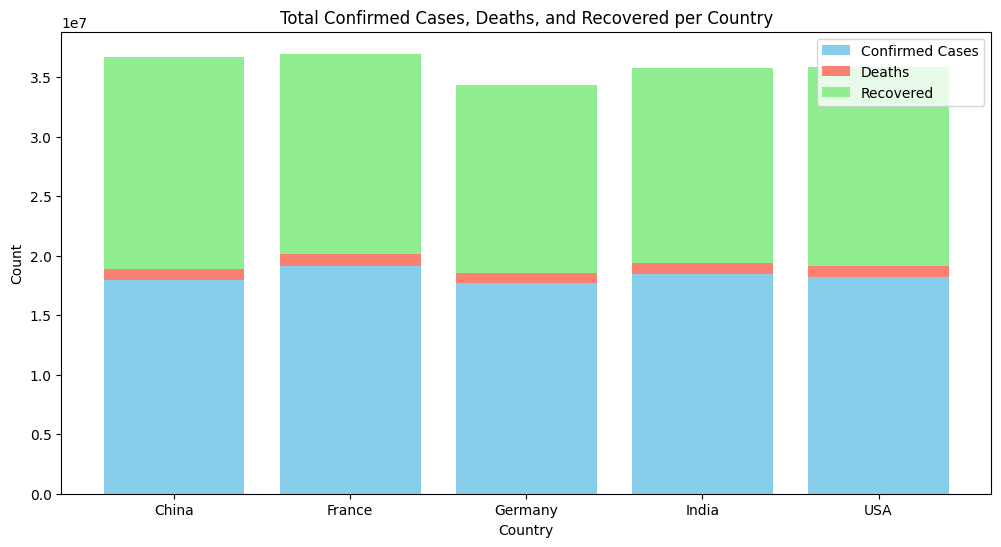

In [53]:
# Total confirmed cases, deaths, and recovered per country
total_stats = covid_data.groupby('Country').agg({
    'ConfirmedCases': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()
print(total_stats)

#Visualize total confirmed cases, deaths, and recovered per country
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(total_stats['Country'], total_stats['ConfirmedCases'], label='Confirmed Cases', color='skyblue')
ax.bar(total_stats['Country'], total_stats['Deaths'], label='Deaths', color='salmon', bottom=total_stats['ConfirmedCases'])
ax.bar(total_stats['Country'], total_stats['Recovered'], label='Recovered', color='lightgreen',
       bottom=total_stats['ConfirmedCases'] + total_stats['Deaths'])

ax.set_title('Total Confirmed Cases, Deaths, and Recovered per Country')
ax.set_ylabel('Count')
ax.set_xlabel('Country')
ax.legend()
print("\n\n")
plt.show()

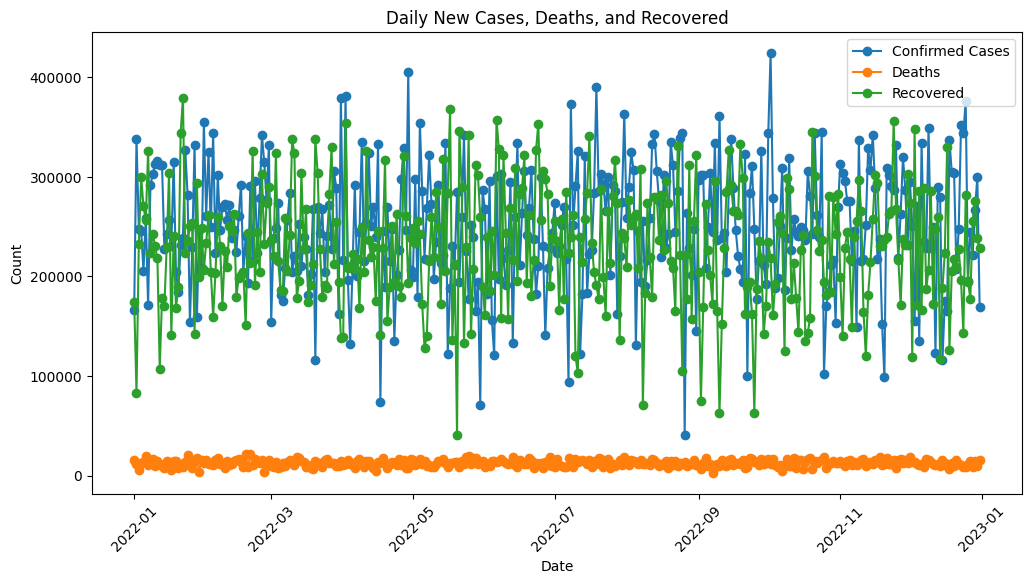

In [54]:
# Daily new cases, deaths, and recovered
#Convert 'Date' column to datetime type
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
daily_stats = covid_data.groupby('Date').agg({
    'ConfirmedCases': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Visualize daily new cases, deaths, and recovered
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['Date'], daily_stats['ConfirmedCases'], label='Confirmed Cases', marker='o')
plt.plot(daily_stats['Date'], daily_stats['Deaths'], label='Deaths', marker='o')
plt.plot(daily_stats['Date'], daily_stats['Recovered'], label='Recovered', marker='o')
plt.title('Daily New Cases, Deaths, and Recovered')
plt.ylabel('Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

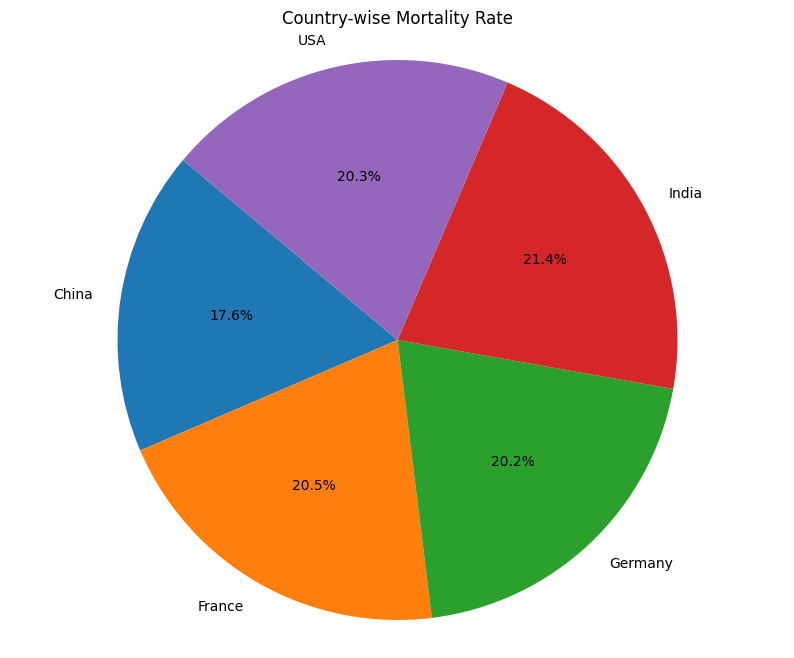

In [55]:
# Calculate mortality rate and recovery rate for each country
covid_data['MortalityRate'] = (covid_data['Deaths'] / covid_data['ConfirmedCases']) * 100
covid_data['RecoveryRate'] = (covid_data['Recovered'] / covid_data['ConfirmedCases']) * 100

# Group data by country and calculate average mortality rate and recovery rate
countrywise_mortality_recovery = covid_data.groupby('Country').agg({
    'MortalityRate': 'mean',
    'RecoveryRate': 'mean'
}).reset_index()

# Plot pie chart for mortality rate
plt.figure(figsize=(10, 8))
plt.pie(countrywise_mortality_recovery['MortalityRate'], labels=countrywise_mortality_recovery['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Country-wise Mortality Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



***From the above pie chart we can conclude that India has the highest mortality rate with 21.4% and China has the lowest mortality rate of 17.6%***

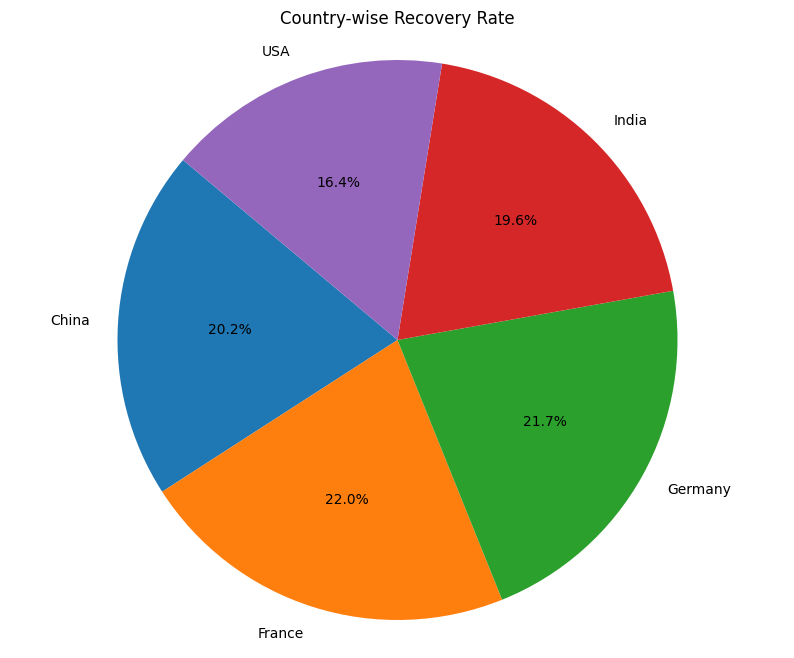

In [56]:
# Plot pie chart for recovery rate
plt.figure(figsize=(10, 8))
plt.pie(countrywise_mortality_recovery['RecoveryRate'], labels=countrywise_mortality_recovery['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Country-wise Recovery Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

***USA has the highest recovery rate of 16.4% and France has the lowest recovery rate 22.0%***

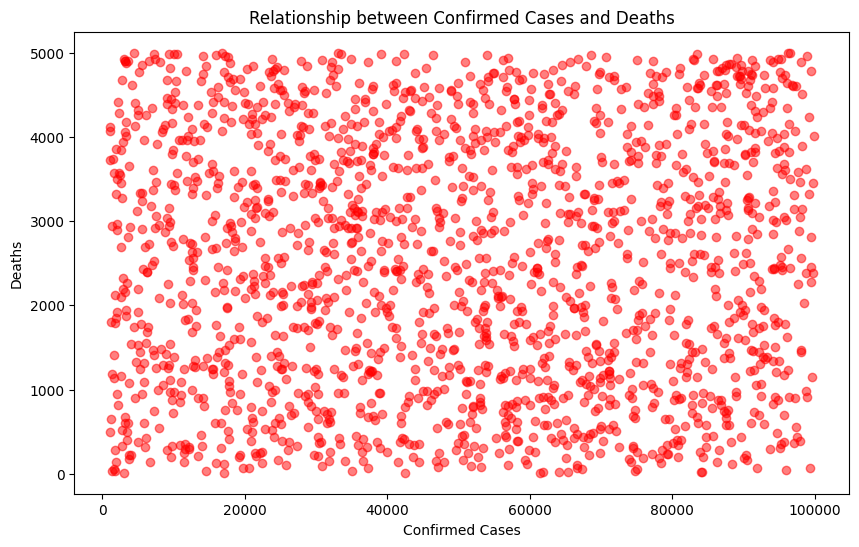

In [57]:
# Scatter plot for relationship between confirmed cases and deaths
plt.figure(figsize=(10, 6))
plt.scatter(covid_data['ConfirmedCases'], covid_data['Deaths'], color='red', alpha=0.5)
plt.title('Relationship between Confirmed Cases and Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()

***There appears to be a positive correlation between confirmed cases and deaths. In general, as the number of confirmed cases increases, the number of deaths also tends to increase. This suggests that areas with higher infection rates may also experience higher mortality rates.However, it's important to note that there is considerable variability in the number of deaths for a given number of confirmed cases. This variability could be due to several factors, including differences in healthcare systems, demographics, testing capabilities, public health measures, and the timing of the outbreak response.***

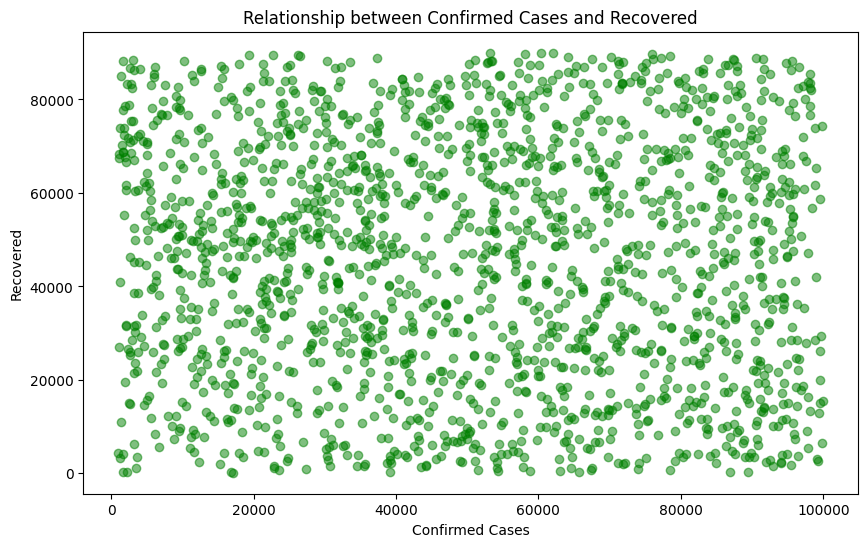

In [30]:
# Scatter plot for relationship between confirmed cases and recovered
plt.figure(figsize=(10, 6))
plt.scatter(covid_data['ConfirmedCases'], covid_data['Recovered'], color='green', alpha=0.5)
plt.title('Relationship between Confirmed Cases and Recovered')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered')
plt.show()


***Similar to the relationship between confirmed cases and deaths, there appears to be a positive correlation between confirmed cases and recoveries. As the number of confirmed cases increases, there is also a tendency for the number of recoveries to increase. This suggests that areas with higher infection rates may also witness a higher number of recoveries, indicating successful management and treatment of cases.While there is an overall trend of increasing recoveries with increasing confirmed cases, there is considerable variability in the number of recoveries for a given number of confirmed cases. This variability could be influenced by factors such as differences in healthcare infrastructure, treatment protocols, availability of medical resources, and the effectiveness of public health interventions.***